# Cats and Dogs Prediction

Import libraries

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [2]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
image_generator = ImageDataGenerator(rescale=1/255, 
                                     horizontal_flip=True,
                                     rotation_range=20,
                                     zoom_range=0.15,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.15,
                                     fill_mode="nearest")

In [4]:
training_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="dataset/cats_and_dogs/train/",
                                                   target_size=(224, 224),
                                                   class_mode="categorical")

validation_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="dataset/cats_and_dogs/validation/",
                                                   target_size=(224, 224),
                                                   class_mode="categorical")

testing_set = image_generator.flow_from_directory(batch_size=32,
                                                   directory="dataset/cats_and_dogs/test/",
                                                   shuffle=False,
                                                   target_size=(224, 224),
                                                   class_mode=None)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


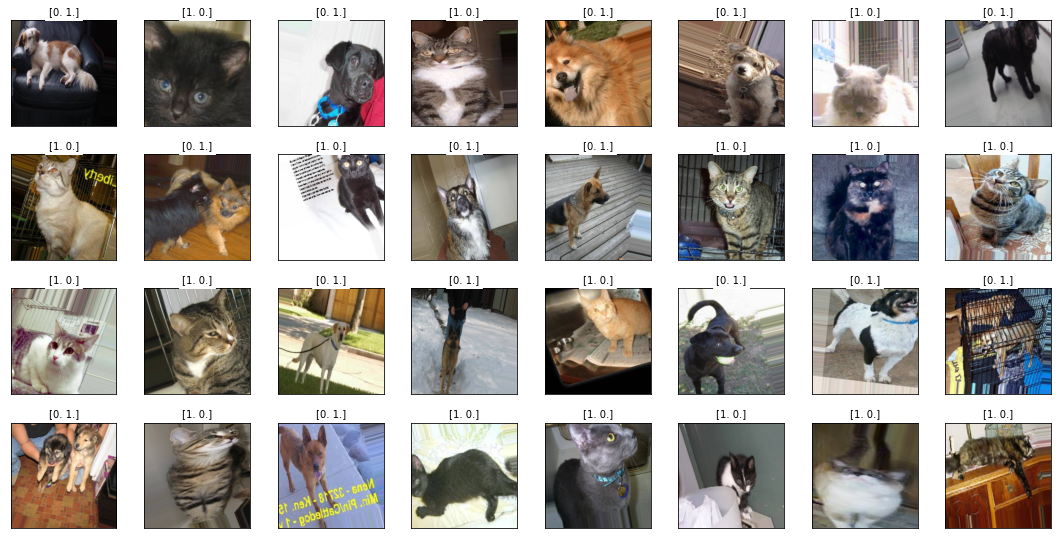

In [5]:
fig = plt.figure(figsize=(15, 15))

batch_1_img = training_set[0]
for i in range(32):
    digit = batch_1_img[0][i]
    label = batch_1_img[1][i]
    #digit_image = digit.reshape(28, 28)
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digit, cmap=plt.cm.binary)
    ax.set_title(str(label), backgroundcolor='white', fontsize=10)
plt.tight_layout()

In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', input_shape = [224, 224, 3]),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation ='softmax')])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 32)        0         
                                                                 
 flatten (Flatten)           (None, 93312)             0

In [8]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         patience=5,
                                         restore_best_weights=True)

In [9]:
history = model.fit(training_set, epochs=20, validation_data=validation_set, callbacks=callback)

Epoch 1/20
63/63 [==============================] - 32s 464ms/step - loss: 0.7166 - accuracy: 0.5405 - val_loss: 0.6921 - val_accuracy: 0.5650
Epoch 2/20
63/63 [==============================] - 29s 458ms/step - loss: 0.6900 - accuracy: 0.5270 - val_loss: 0.6945 - val_accuracy: 0.5110
Epoch 3/20
63/63 [==============================] - 30s 478ms/step - loss: 0.6834 - accuracy: 0.5720 - val_loss: 0.6822 - val_accuracy: 0.6150
Epoch 4/20
63/63 [==============================] - 30s 478ms/step - loss: 0.6704 - accuracy: 0.6010 - val_loss: 0.6679 - val_accuracy: 0.5810
Epoch 5/20
63/63 [==============================] - 30s 480ms/step - loss: 0.6571 - accuracy: 0.5965 - val_loss: 0.6488 - val_accuracy: 0.6350
Epoch 6/20
63/63 [==============================] - 30s 482ms/step - loss: 0.6397 - accuracy: 0.6395 - val_loss: 0.6435 - val_accuracy: 0.6220
Epoch 7/20
63/63 [==============================] - 30s 485ms/step - loss: 0.6445 - accuracy: 0.6205 - val_loss: 0.6410 - val_accuracy: 0.6330

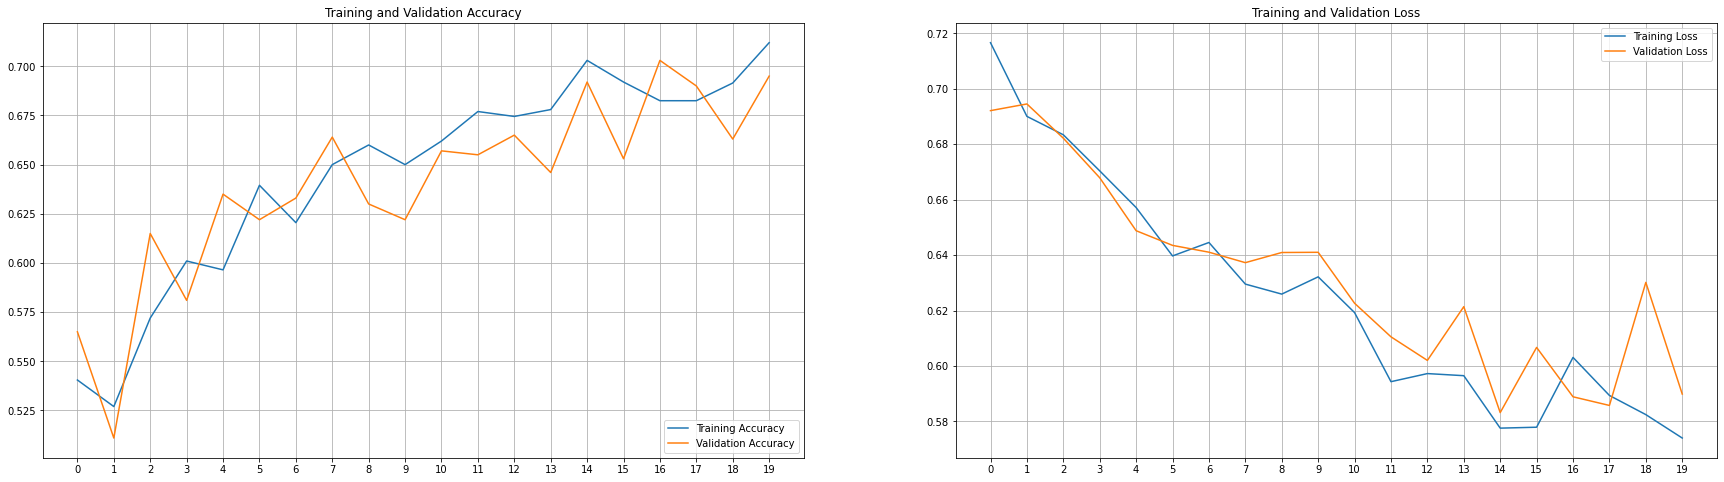

In [11]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.xticks(range(0,20))
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xticks(range(0,20))
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()